In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('wordnet')
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import GRU, Dense, Embedding, Flatten, Dropout
from keras.activations import softmax
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv('./Data/text.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './Data/text.csv'

In [ ]:
# Rename columns
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Drop Column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
df.shape

(416809, 2)

In [ ]:
# Define a dictionary to map numerical labels to corresponding emotions
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Replace numerical labels with corresponding emotions in the 'Label' column
df['Label'] = df['Label'].map(label_map)

In [ ]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


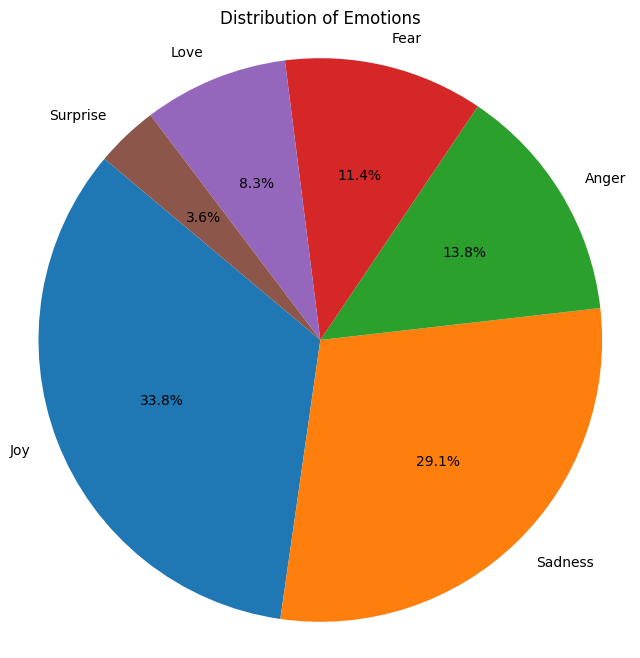

In [ ]:
# Calculate the count of each label
label_counts = df['Label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

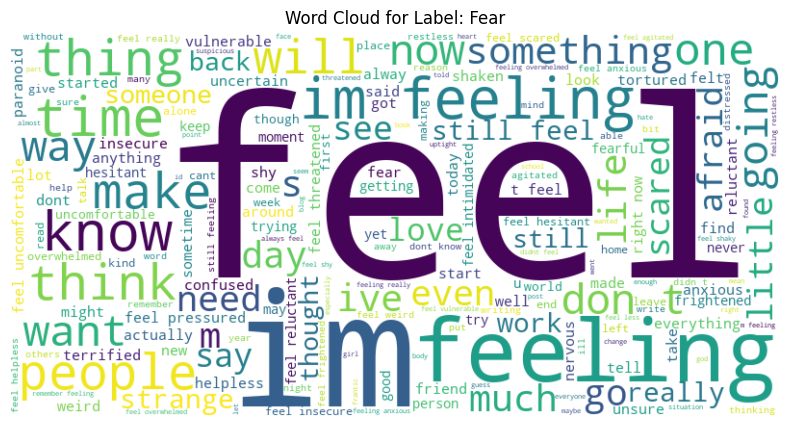

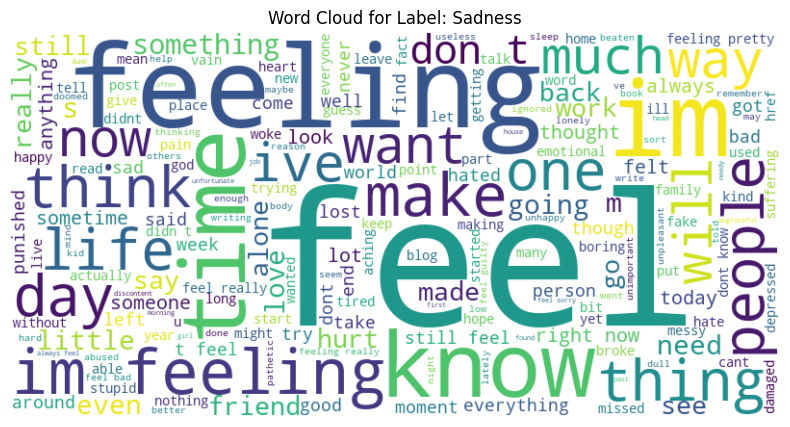

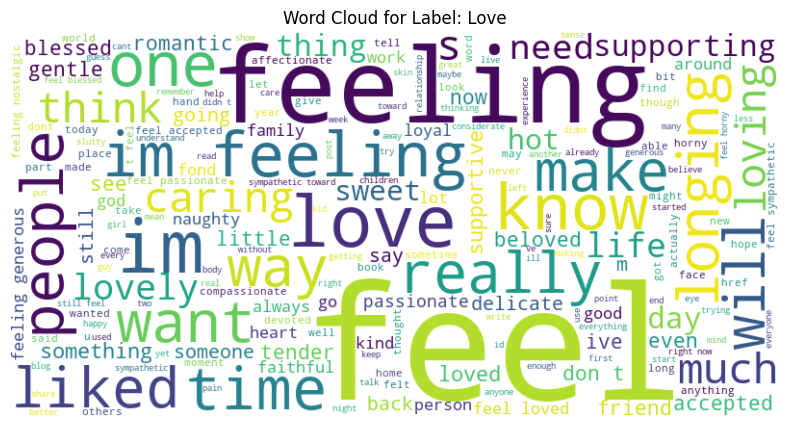

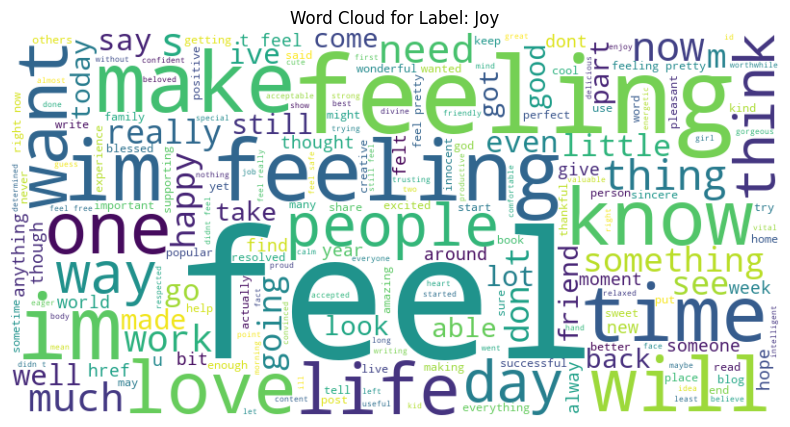

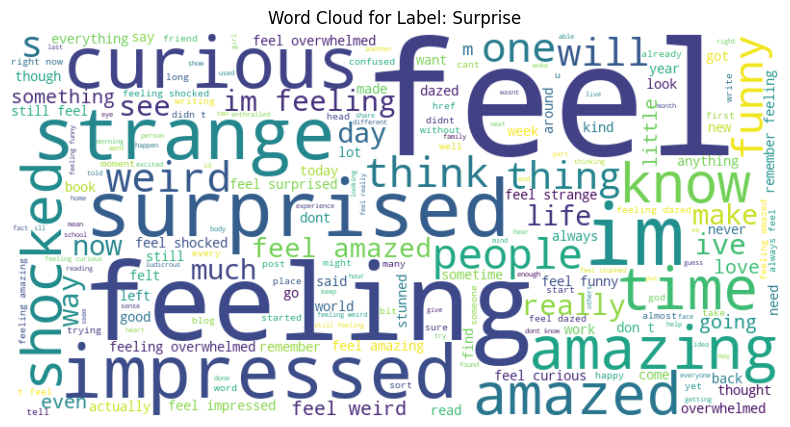

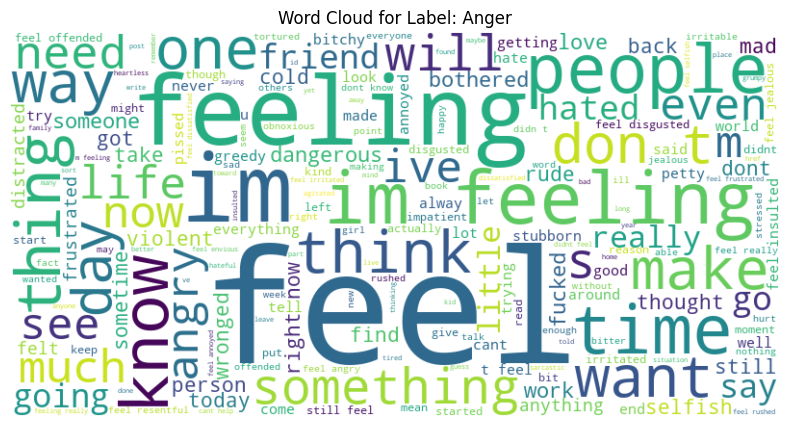

In [ ]:
# Iterate through unique labels
for label in df['Label'].unique():
    # Filter the DataFrame for the current label
    filtered_df = df[df['Label'] == label]
    
    # Concatenate all text data for the current label
    text = ' '.join(filtered_df['Text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label: {label}')
    plt.axis('off')
    plt.show()

In [ ]:
# Let's revert the labels back to their original numeric values
label_mapping = {'Sadness': 0, 'Joy': 1, 'Love': 2, 'Anger': 3, 'Fear': 4, 'Surprise': 5}

# Reverse mapping to convert labels back to numeric values
df['Label'] = df['Label'].replace(label_mapping)

In [ ]:
# Convert 'Text' column to lowercase
df['Text'] = df['Text'].str.lower()
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Remove extra white spaces from the 'Text' column
df['Text'] = df['Text'].str.strip()
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Text'] = df['Text'].apply(remove_html_tags)

In [ ]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_urls)

In [ ]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation

In [ ]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Text'] = df['Text'].apply(remove_punctuation)

In [ ]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Text'] = df['Text'].apply(replace_chat_words)


In [ ]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Text'] = df['Text'].apply(remove_emojis)

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Text_stemmed'] = df['Text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

In [ ]:
X = df['Text']
y = df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

vocab_size = min(len(tokenizer.word_index) + 1, tokenizer.num_words)


In [ ]:
# Max Len in X_train_sequences
max_length = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (max_length):", max_length)

Maximum sequence length (max_length): 79


In [ ]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

In [ ]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[  18    1   70 ...    0    0    0]
 [ 274    6  726 ...    0    0    0]
 [   2   45  719 ...    0    0    0]
 ...
 [   2  593    0 ...    0    0    0]
 [   5   16  490 ...    0    0    0]
 [   2  150 1769 ...    0    0    0]]

X_test_padded:
[[ 121   41  169 ...    0    0    0]
 [3061    1  796 ...    0    0    0]
 [ 188  310   49 ...    0    0    0]
 ...
 [ 822  273 1907 ...    0    0    0]
 [1862 7348  622 ...    0    0    0]
 [  83    2  411 ...    0    0    0]]


In [ ]:
# Embedding Vocabulary Size 
vocabulary_size = len(set(token for sequence in X_train_padded for token in sequence))
vocabulary_size

10000

In [ ]:
embedding_dim = 100 

# Define the model
model = Sequential()

# Add an embedding layer with input_dim=1000, output_dim=100, input_length=75
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=max_length))

# Add a bidirectional GRU layer with 128 units
model.add(Bidirectional(GRU(128)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add dropout regularization
model.add(Dropout(0.5))

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add dropout regularization
model.add(Dropout(0.5))

# Add the output layer with 6 units for 6 labels and softmax activation
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Train 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Define EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',        
    patience=2,                
    restore_best_weights=True  
)

checkpoint = ModelCheckpoint('emotion_model.keras', monitor='val_loss', save_best_only=True)

# Fit the model
history = model.fit(
    X_train_padded, y_train,
    epochs=10,                      
    batch_size=128,
    validation_data=(X_test_padded, y_test),
    callbacks=[early_stop]          
)


Epoch 1/10
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 237s 90ms/step - accuracy: 0.7986 - loss: 0.7027 - val_accuracy: 0.9346 - val_loss: 0.1355
Epoch 2/10
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 252s 97ms/step - accuracy: 0.9370 - loss: 0.1384 - val_accuracy: 0.9379 - val_loss: 0.1146
Epoch 3/10
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 332s 127ms/step - accuracy: 0.9400 - loss: 0.1197 - val_accuracy: 0.9386 - val_loss: 0.1087
Epoch 4/10
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 282s 108ms/step - accuracy: 0.9408 - loss: 0.1130 - val_accuracy: 0.9402 - val_loss: 0.1090
Epoch 5/10
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 249s 96ms/step - accuracy: 0.9417 - loss: 0.1105 - val_accuracy: 0.9398 - val_loss: 0.1092


In [ ]:
from tensorflow.keras.models import load_model

# Directory to save the model
model.save("emotion_classification_model.keras")

print("Model saved successfully!")


Model saved successfully!


In [ ]:
import pickle

# Save tokenizer
with open('emotion_model_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("Tokenizer saved successfully!")


Tokenizer saved successfully!


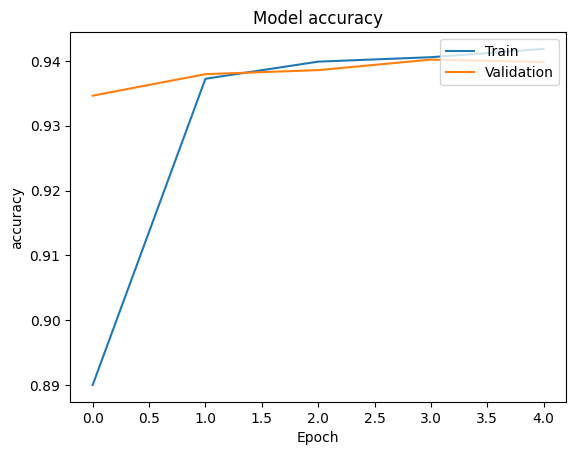

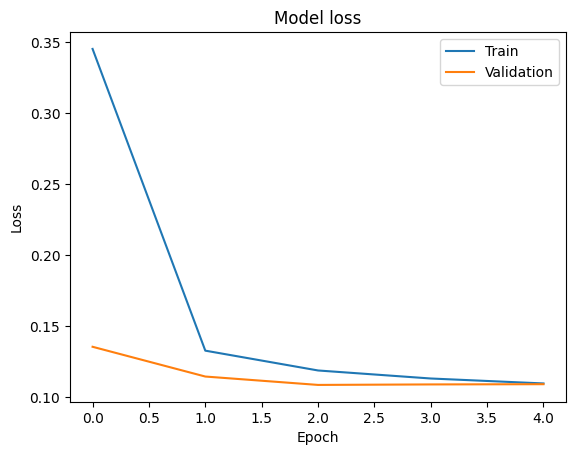

In [ ]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [1]:
new_message = "I'm feeling low today"


In [3]:
#Test the model
import pickle
from tensorflow.keras.models import load_model

max_length = 79

# Load tokenizer
with open('emotion_model_tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Preprocess new text
sequence = tokenizer.texts_to_sequences([new_message])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

# Load model
model = load_model('emotion_classification_model.keras')

# Predict emotion
pred = model.predict(padded_sequence)

# Predicted label (numeric)
predicted_label = np.argmax(pred)

# Emotion label mapping to emoji
label_mapping = {
    0: '😞',  # Sadness
    1: '😊',  # Joy
    2: '❤️',  # Love
    3: '😡',  # Anger
    4: '😱',  # Fear
    5: '😲'   # Surprise
}

# Reverse the mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Get emotion
predicted_emotion = reverse_label_mapping[predicted_label]

print("Predicted Emotion:", predicted_emotion)


NameError: name 'pad_sequences' is not defined